<a href="https://colab.research.google.com/github/Michael-Stout/Assignement_5_1/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: none, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [198]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [199]:
data = pd.read_csv('data/coupons.csv')

In [200]:
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

*2*. Investigate the dataset for missing or problematic data.

In [202]:
# Check for columns with missing data
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [203]:
# Drop car column as there is too much data missing
data = data.drop('car', axis=1)

In [204]:
# Calculate the percentages of unique records with missing values
unique_rows_missing_values = round(data.isnull().any(axis=1).mean() * 100, 1                                      )
print(unique_rows_missing_values,"%")

4.8 %


In [205]:
# Drop records with missing data as it is less than 5%
data.dropna(inplace=True)

In [206]:
# Determine total offers
total_offers = len(data)
print(total_offers)

12079


In [207]:
# Consolodate, reconfigure and create columns for easy of use

# Combine 'direction_same' and 'direction_opp' into a single column 'samedataction' with 0 as no, and 1 as yes
data['same_direction'] = [1 if same else 0 for same, opp in zip(data['direction_same'] == 1, data['direction_opp'] == 1)]

# Drop the original columns
data.drop(['direction_same', 'direction_opp'], axis=1, inplace=True)

# Combine 'toCoupon_GEQ5min', 'toCoupon_GEQ15min' & 'toCoupon_GEQ25min' into on column to_coupon_geq and assinge 5, 15 & 25 accordingly
data['to_coupon_geq'] = [
    25 if geq25 else 15 if geq15 else 5 if geq5 else 0
    for geq5, geq15, geq25 in zip(
        data['toCoupon_GEQ5min'] == 1,
        data['toCoupon_GEQ15min'] == 1,
        data['toCoupon_GEQ25min'] == 1
    )
]

# Drop the original columns
data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)

# Create a column called professional_status to suppliment occupation information
occupation_to_status = {
    'blue collar': [
        'Production Occupations', 'Building & Grounds Cleaning & Maintenance',
        'Construction & Extraction', 'Installation Maintenance & Repair',
        'Transportation & Material Moving', 'Protective Service',
        'Food Preparation & Serving Related', 'Farming Fishing & Forestry',
        'Healthcare Support'
    ],
    'white collar': [
        'Education & Training & Library', 'Community & Social Services',
        'Personal Care & Service', 'Office & Administrative Support',
        'Architecture & Engineering', 'Healthcare Practitioners & Technical',
        'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media',
        'Computer & Mathematical', 'Life Physical Social Science',
        'Legal', 'Business & Financial'
    ],
    'unemployed': ['Unemployed'],
    'student': ['Student'],
    'retired': ['Retired']
}

status_map = {occ: status for status, occs in occupation_to_status.items() for occ in occs}

data['professional_status'] = data['occupation'].map(lambda x: status_map.get(x, 'other'))

In [208]:
# Correct the spelling and rename columns for user-friendliness & standardization
columns_to_rename = {
    'passanger': 'passenger',
    'maritalStatus': 'marital_status',
    'Bar': 'monthly_bar_visits',
    'CoffeeHouse': 'monthly_coffeehouse_visits',
    'CarryAway': 'monthly_takeaway_visits',
    'RestaurantLessThan20': 'monthly_restaurant_visits_lt20',
    'Restaurant20To50': 'monthly_restaurant_visits_btw20_50',
    'Y': 'accepted'
}

for old_name, new_name in columns_to_rename.items():
    data.columns = data.columns.str.replace(old_name, new_name)

In [209]:
# Map new column values for functionality
destination_map = {
    'No Urgent Place': 'other',
    'Home': 'home',
    'Work': 'work'
}

passenger_map = {
    'Alone': 'none',
    'Friend(s)': 'friend',
    'Kid(s)': 'child',
    'Partner': 'partner'
}

weather_map = {
    'Sunny': 'sunny',
    'Rainy': 'rainy',
    'Snowy': 'snowy'
}

# temperature - no change

# Time has been changed to a integer
time_map = {
    '7AM': 700,
    '10AM': 1000,
    '2PM': 1400,
    '6PM': 1800,
    '10PM': 2200
}

coupon_map = {
    'Restaurant(<20)': 'restaurant < $20',
    'Coffee House': 'coffeehouse',
    'Bar': 'bar',
    'Carry out & Take away': 'takeaway',
    'Restaurant(20-50)': 'restaurant $20 to 50'
}

expiration_map = {
    '2h': 2,
    '1d': 24
}

gender_map = {
    'Male': 'male',
    'Female': 'female'
}

# Age has been changed to an integer
age_int_map = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

marital_map = {
    'Single': 'single',
    'Married partner': 'married',
    'Unmarried partner': 'partner',
    'Divorced': 'divorced',
    'Widowed': 'widowed'
}

# has_children - no change

education_map = {
    'Some High School': 1,
    'High School Graduate': 2,
    'Some college - no degree': 3,
    'Associates degree': 4,
    'Bachelors degree': 5,
    'Graduate degree (Masters or Doctorate)': 6
}

# occupation - no change

income_map = {
    'Less than $12500': 12499,
    '$12500 - $24999': 12500,
    '$25000 - $37499': 25000,
    '$37500 - $49999': 37500,
    '$50000 - $62499': 50000,
    '$62500 - $74999': 62500,
    '$75000 - $87499': 75000,
    '$87500 - $99999': 87500,
    '$100000 or More': 100000
}

# Values for visits per month
  #  bar
  # coffeehouse
  # takeaway
  # restaurant lt20
  # restaurant btw20_50

frequency_map = {
    'never': 0,
    'less1': -1,
    '1~3': 3,
    '4~8': 8,
    'gt8': 9
}

# accepted - no change

In [210]:
# Change values to mappings

# Dictionary mapping column names to their respective mapping dictionaries
maps = {
    'destination': destination_map,
    'passenger': passenger_map,
    'weather': weather_map,
    'time': time_map,
    'monthly_bar_visits': frequency_map,
    'monthly_coffeehouse_visits': frequency_map,
    'monthly_takeaway_visits': frequency_map,
    'monthly_restaurant_visits_lt20': frequency_map,
    'monthly_restaurant_visits_btw20_50': frequency_map,
    'coupon': coupon_map,
    'expiration': expiration_map,
    'gender': gender_map,
    'age': age_int_map,
    'marital_status': marital_map,
    'education': education_map,
    'income': income_map
}

# Loop through the dictionary and replace values in each column based on the corresponding map
for column, map_dict in maps.items():
    data[column] = data[column].replace(map_dict)

4.  What proportion of the total observations chose to accept the coupon?

In [211]:
# Calculate the proportion of accepted
accepted_prop = data['accepted'].mean()

# Calculate the total number of accepted coupons
total_accepteds = int(accepted_prop * total_offers)

print(f"Total number of accepted coupons: {total_accepteds} of {total_offers}")
print(f"Proportion of coupon accepted: {accepted_prop:.3f}")

Total number of accepted coupons: 6877 of 12079
Proportion of coupon accepted: 0.569


In [212]:
# Create a DataFrame for the horizontal bar graph
plot_data = pd.DataFrame({
    'Label': [''],  # Set to an empty string to remove the label
    'Proportion': [accepted_prop]
})

# Create the horizontal bar graph using Plotly Express
bar_plot_coupon = px.bar(plot_data, y='Label', x='Proportion',
                         orientation='h', title="Proportion of Coupons Accepted",
                         labels={'Proportion': str(total_accepteds) + " of " + str(total_offers) + " Coupons Accepted", 'Label': ''},
                         width=800, height=210)

# Customize the bar graph
bar_plot_coupon.update_traces(texttemplate='%{x:.3}', textposition='inside')
bar_plot_coupon.update_layout(showlegend=False, xaxis_range=[0, 1])

# Show the plot
bar_plot_coupon.show()

*5*. Use a bar plot to visualize the `coupon` column.

In [213]:
# Calculate the total counts for each coupon category
total_counts = data['coupon'].value_counts().reset_index()
total_counts.columns = ['coupon', 'Total']

# Calculate the count of accepted=1 for each coupon category
accepted_counts = data[data['accepted'] == 1]['coupon'].value_counts().reset_index()
accepted_counts.columns = ['coupon', 'Accepted']

# Merge the total and accepted counts on the 'coupon' column
merged_data = pd.merge(total_counts, accepted_counts, on='coupon', how='left').fillna(0)

# Calculate the proportion of accepted coupons
merged_data['Proportion'] = merged_data['Accepted'] / merged_data['Total']

# Format the text to show both the count of accepted coupons and the proportion
merged_data['Text'] = merged_data.apply(lambda row: f"{int(row['Accepted'])} of {int(row['Total'])} ({row['Proportion']:.3})", axis=1)

merged_data = merged_data.sort_values(by='Proportion', ascending=False)

# Create the bar graph using Plotly Express
bar_plot_coupon = px.bar(merged_data, x='coupon', y='Proportion', color='coupon',
             title="Acceptance Count & Proportion of Each Coupon",
             labels={'coupon': 'Coupon Category', 'Proportion': 'Proportion Accepted'},
             text='Text')

bar_plot_coupon.update_traces(hovertemplate='<b>%{x}</b><br>Total Offered: %{customdata[1]}<br>Accepted: %{customdata[0]}<br>Proportion: %{y:.2}',
                  textfont_size=18)

bar_plot_coupon.update_layout(
    xaxis_title="Coupon Category",
    yaxis_title="Proportion Accepted",
    yaxis=dict(tickformat='.0', range=[0, 1]),
    xaxis=dict(tickfont=dict(size=18)),
    showlegend=False
)

# Show the plot
bar_plot_coupon.show()

6. Use a histogram to visualize the temperature column.

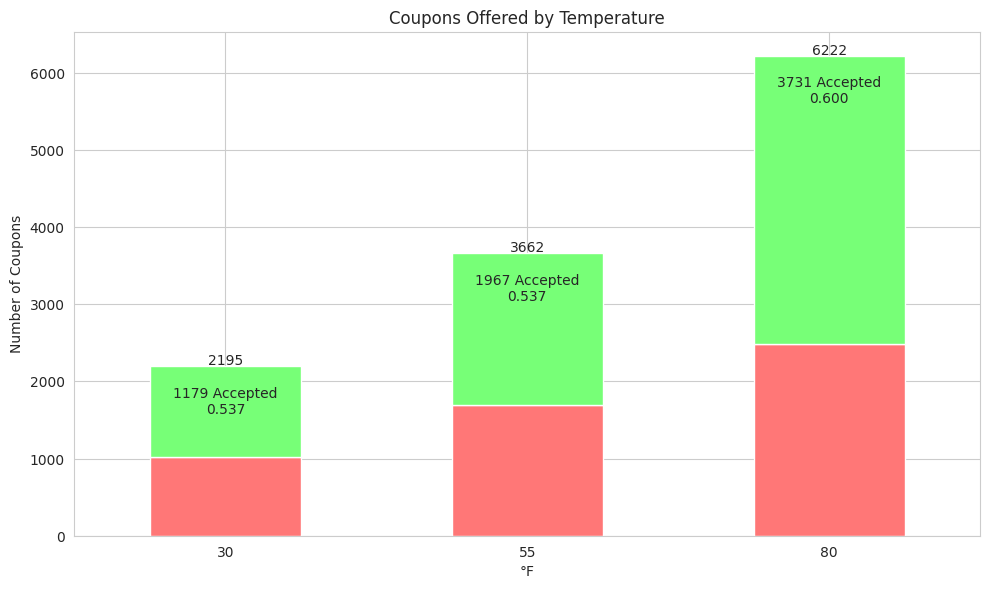

In [214]:
# Group by temperature and accepted, and count the number of coupons
coupon_counts = data.groupby(['temperature', 'accepted']).size().unstack()

# Calculate the total offered coupons for each temperature
total_offered = data.groupby('temperature').size()

# Calculate the proportion of accepted coupons for each temperature
proportion_accepted = coupon_counts[1] / total_offered

# Create the histogram
ax = coupon_counts.plot(kind='bar', stacked=True, figsize=(10, 6),
                        color=['#FF7777', '#77ff77'], legend=False)

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add the total offered coupons and proportion accepted at the top of each bar
for i, temp in enumerate(coupon_counts.index):
    total = total_offered[temp]
    accepted = coupon_counts.loc[temp, 1] if 1 in coupon_counts.columns else 0
    prop = proportion_accepted[temp] if 1 in coupon_counts.columns else 0
    ax.text(i, total, f'\n\n{total}\n\n{accepted} Accepted\n{prop:.3f}',
            ha='center', va='center_baseline')

# Add labels and title
ax.set_xlabel('°F')
ax.set_ylabel('Number of Coupons')
ax.set_title('Coupons Offered by Temperature')

plt.tight_layout()

plt.savefig('images/hist_temperature.png')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [215]:
# Create a bar coupon column dataframe
bar_df = data.loc[data['coupon'] == 'bar']

**2**. What proportion of bar coupons were accepted?

In [216]:
# Calculate total bar coupons offered
total_bar_coupons = len(bar_df)

# Calculate proportion accepted
proportion_accepted = bar_df['accepted'].mean()

# Calculate total bar coupons accepted
total_bar_accepted = int(proportion_accepted * total_bar_coupons)


# Create a DataFrame for the horizontal bar graph
plot_data = pd.DataFrame({
    'Label': [''],  # Set to an empty string to remove the label
    'Proportion': [proportion_accepted]
})

# Create the horizontal bar graph using Plotly Express
bar_plot_coupon = px.bar(plot_data, y='Label', x='Proportion',
                         orientation='h', title="Proportion of Bar Coupons Accepted",
                         labels={'Proportion': str(total_bar_accepted) + " of " + str(total_bar_coupons) + " Bar Coupons Accepted", 'Label': ''},
                         width=800, height=210)

# Customize the bar graph
bar_plot_coupon.update_traces(texttemplate='%{x:.3f}', textposition='inside')
bar_plot_coupon.update_layout(showlegend=False, xaxis_range=[0, 1])

# Show the plot
bar_plot_coupon.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [217]:
print("Those who accepted a coupon and went to a bar <= 3 times/month", round(bar_df[bar_df['monthly_bar_visits'] < 4]['accepted'].mean(numeric_only=True), 3))
print("Those who accepted a coupon and went to a bar > 3 times/month",round(bar_df[bar_df['monthly_bar_visits'] > 3]['accepted'].mean(numeric_only=True), 3))

Those who accepted a coupon and went to a bar <= 3 times/month 0.373
Those who accepted a coupon and went to a bar > 3 times/month 0.762


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [218]:
# Create subgroup mask
subgroup_mask = (bar_df['monthly_bar_visits'] > 1) & (bar_df['age'] > 25)

# Get counts for subgroup with accept == 1
subgroup_accepted = bar_df[(subgroup_mask) & (bar_df['accepted'] == 1)].shape[0]
subgroup_total = bar_df[subgroup_mask].shape[0]
subgroup_pct = subgroup_accepted / subgroup_total

# Get counts for those not in subgroup with accept == 1
not_subgroup_accepted = bar_df[(~subgroup_mask) & (bar_df['accepted'] == 1)].shape[0]
not_subgroup_total = bar_df[~subgroup_mask].shape[0]
not_subgroup_pct = not_subgroup_accepted / not_subgroup_total

print(f"Target Group: {subgroup_accepted} / {subgroup_total} ({subgroup_pct:.3})")

print(f"All Others: {not_subgroup_accepted} / {not_subgroup_total} ({not_subgroup_pct:.3})")

Target Group: 278 / 403 (0.69)
All Others: 510 / 1510 (0.338)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [219]:
# Create subgroup mask
subgroup_mask = (bar_df['monthly_bar_visits'] > 1) & (bar_df['passenger'] != 'kid') & (bar_df['occupation'] != 'Farming Fishing & Forestry')
# Get counts for subgroup with accept == 1
subgroup_accepted = bar_df[(subgroup_mask) & (bar_df['accepted'] == 1)].shape[0]
subgroup_total = bar_df[subgroup_mask].shape[0]
subgroup_pct = subgroup_accepted / subgroup_total

# Get counts for those not in subgroup with accept == 1
not_subgroup_accepted = bar_df[(~subgroup_mask) & (bar_df['accepted'] == 1)].shape[0]
not_subgroup_total = bar_df[~subgroup_mask].shape[0]
not_subgroup_pct = not_subgroup_accepted / not_subgroup_total

print(f"Target Group: {subgroup_accepted} / {subgroup_total} ({subgroup_pct:.3})")

print(f"All Others: {not_subgroup_accepted} / {not_subgroup_total} ({not_subgroup_pct:.3})")

Target Group: 392 / 572 (0.685)
All Others: 396 / 1341 (0.295)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [220]:
# Create masks for each target group
target1_mask = (bar_df['accepted'] == 1) & (bar_df['monthly_bar_visits'] > 1) & (bar_df['passenger'] != 'kid') & (bar_df['marital_status'] != 'widowed')
target2_mask = (bar_df['accepted'] == 1) & (bar_df['monthly_bar_visits'] > 1) & (bar_df['age'] < 30)
target3_mask = (bar_df['accepted'] == 1) & (bar_df['monthly_restaurant_visits_lt20'] > 4) & (bar_df['income'] < 50000)

# Get counts and percentages for each target group
target1_count = bar_df[target1_mask].shape[0]
target1_total = bar_df.shape[0]
target1_pct = target1_count / target1_total

target2_count = bar_df[target2_mask].shape[0]
target2_total = bar_df.shape[0]
target2_pct = target2_count / target2_total

target3_count = bar_df[target3_mask].shape[0]
target3_total = bar_df.shape[0]
target3_pct = target3_count / target3_total

print(f"Target Group 1: {target1_count} / {target1_total} ({target1_pct:.3})")
print(f"Target Group 2: {target2_count} / {target2_total} ({target2_pct:.3})")
print(f"Target Group 3: {target3_count} / {target3_total} ({target3_pct:.3})")

Target Group 1: 392 / 1913 (0.205)
Target Group 2: 236 / 1913 (0.123)
Target Group 3: 152 / 1913 (0.0795)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

*   The overall proportion of bar coupons accepted is 41.2% (788 of 1913), suggesting half of drivers do not accept bar coupons while driving.
* Those who go to a bar four or more times a month are more likely to accept bar coupons (76%) than those who go three times a month or less (37.3%).
* Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate (69%) than all others (33.8%).
* When considering drivers who go to bars more than once a month and have passengers who are not kids and have occupations other than farming, fishing, or forestry, the acceptance rate is 68.5%, which is significantly higher than the acceptance rate for all others (29.5%).
* Comparing the acceptance rates among different groups of drivers offered a bar coupon:
  * Those who go to bars more than once a month have passengers who are not under 18 and are not widowed; the acceptance rate is 20.5%.
  * The acceptance rate is 12.3% for those who go to bars more than once a month and are under 30.
  * If one goes to cheap restaurants more than four times a month and earns less than $50,000/year, this indicates they would not accept a bar coupon; the acceptance rate is 8.0%.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [221]:
takeaway_df = data.loc[data['coupon'] == 'takeaway']

print(f"Number of takeaway coupons offered: {len(takeaway_df)}")
print(f"Number of takeaway coupons accepted (1): {len(takeaway_df[takeaway_df['accepted'] == 1])}")
print(f"Number of takeaway coupons not accepted (0): {len(takeaway_df[takeaway_df['accepted'] == 0])}")

Number of takeaway coupons offered: 2280
Number of takeaway coupons accepted (1): 1682
Number of takeaway coupons not accepted (0): 598


In [222]:
accepted_takeaway = len(takeaway_df[takeaway_df['accepted'] == 1])
total_takeaway = len(takeaway_df)
proportion_accepted = accepted_takeaway / total_takeaway

print(f"Proportion of accepted takeaway coupons: {proportion_accepted:.3f}")

Proportion of accepted takeaway coupons: 0.738


In [223]:
# Filter for single, divorced, or widowed
marital_status_filter = (takeaway_df['marital_status'] == 'single') | (takeaway_df['marital_status'] == 'divorced') | (takeaway_df['marital_status'] == 'widowed')

# Filter for has_children == 1
has_children_filter = (takeaway_df['has_children'] == 1)

# Combine filters
combined_filter = marital_status_filter & has_children_filter

# Apply filter to get subset
subset_df = takeaway_df[combined_filter]

# Calculate acceptance rate
accepted = len(subset_df[subset_df['accepted'] == 1])
total = len(subset_df)

print(f"Number of accepted takeaway coupons: {accepted} out of {total} total")

acceptance_rate = accepted / total
print(f"Acceptance rate for single/divorced/widowed with children: {acceptance_rate:.2f}")

Number of accepted takeaway coupons: 172 out of 230 total
Acceptance rate for single/divorced/widowed with children: 0.75


**Percentage of Accepted Coupons by Professional Status**

In [224]:
import plotly.express as px

# Filter for only accepted takeaway coupons
accepted_takeaway_df = takeaway_df[takeaway_df['accepted'] == 1]

# Count the frequency of each professional_status for accepted coupons
status_counts = accepted_takeaway_df['professional_status'].value_counts()

# Create pie chart
professional_status_pie = px.pie(values=status_counts, names=status_counts.index,
             title='Professional Status Distribution for Accepted Takeaway Coupons')

professional_status_pie.show()

**Proportion of Accepted Takeaway Coupons by Professional Status**




In [225]:
status_proportions = []

for status in takeaway_df['professional_status'].unique():
    status_df = takeaway_df[takeaway_df['professional_status'] == status]

    total_offered = len(status_df)
    total_accepted = len(status_df[status_df['accepted'] == 1])

    proportion = total_accepted / total_offered

    status_proportions.append((status, proportion, total_offered, total_accepted))

# Sort by proportion descending
status_proportions.sort(key=lambda x: x[1], reverse=True)

# Print out results
for status, proportion, total_offered, total_accepted in status_proportions:
    print(f"{status.capitalize()}")
    print(f"Total takeaway coupons offered: {total_offered}")
    print(f"Total takeaway coupons accepted: {total_accepted}")
    print(f"Proportion of accepted coupons: {proportion:.3f}\n")

Blue collar
Total takeaway coupons offered: 267
Total takeaway coupons accepted: 226
Proportion of accepted coupons: 0.846

Unemployed
Total takeaway coupons offered: 347
Total takeaway coupons accepted: 261
Proportion of accepted coupons: 0.752

White collar
Total takeaway coupons offered: 1123
Total takeaway coupons accepted: 822
Proportion of accepted coupons: 0.732

Retired
Total takeaway coupons offered: 84
Total takeaway coupons accepted: 59
Proportion of accepted coupons: 0.702

Other
Total takeaway coupons offered: 164
Total takeaway coupons accepted: 115
Proportion of accepted coupons: 0.701

Student
Total takeaway coupons offered: 295
Total takeaway coupons accepted: 199
Proportion of accepted coupons: 0.675



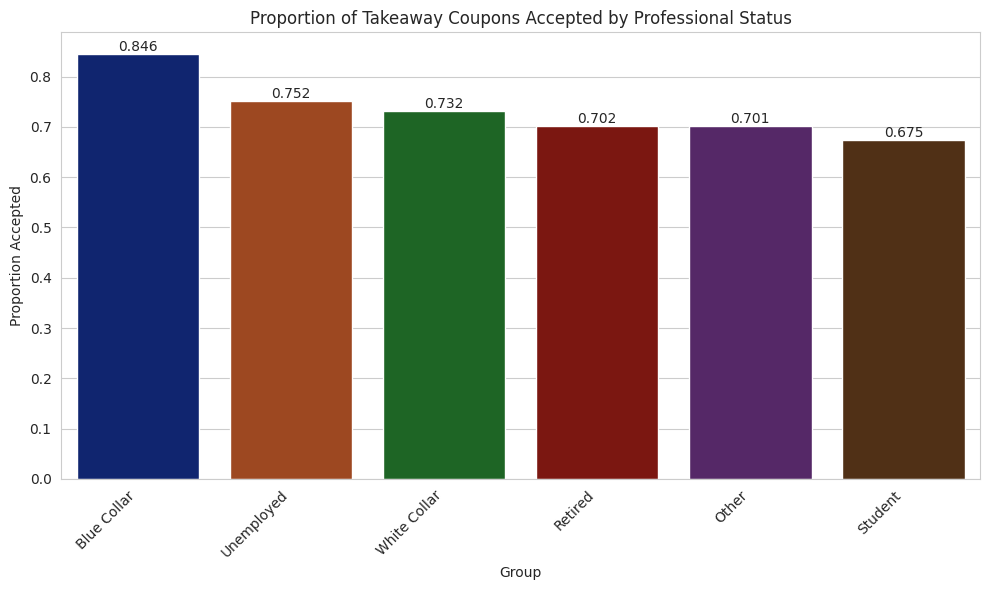

In [226]:
# Data
groups = ['Blue Collar', 'Unemployed', 'White Collar', 'Retired', 'Other', 'Student']
proportions = [0.846, 0.752, 0.732, 0.702, 0.701, 0.675]

# Creating a DataFrame
df = pd.DataFrame({'Group': groups, 'Proportion Accepted': proportions})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Group', y='Proportion Accepted', hue='Group', data=df, palette="dark")
plt.title('Proportion of Takeaway Coupons Accepted by Professional Status')
plt.xticks(rotation=45, ha="right")

# Adding the text on the bars
for index, value in enumerate(proportions):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Remove the group labels at the bottom
plt.tick_params(bottom=False)

plt.savefig('images/proportion_accepted_chart.png')

plt.tight_layout()
plt.show()


**Proportion of White Collar Professionals who Accepted Coupons by Marital

In [227]:
marital_proportions = []

for status in takeaway_df[(takeaway_df['professional_status'] == 'white collar')]['marital_status'].unique():
    status_df = takeaway_df[(takeaway_df['professional_status'] == 'white collar') & (takeaway_df['marital_status'] == status)]

    total_offered = len(status_df)
    total_accepted = len(status_df[status_df['accepted'] == 1])

    proportion = total_accepted / total_offered

    marital_proportions.append((status, proportion, total_offered, total_accepted))

# Sort by proportion descending
marital_proportions.sort(key=lambda x: x[1], reverse=True)

# Print out results
for status, proportion, total_offered, total_accepted in marital_proportions:
    print(f"{status.capitalize()}")
    print(f"Total takeaway coupons offered: {total_offered}")
    print(f"Total takeaway coupons accepted: {total_accepted}")
    print(f"Proportion of accepted coupons: {proportion:.3f}\n")

Single
Total takeaway coupons offered: 388
Total takeaway coupons accepted: 292
Proportion of accepted coupons: 0.753

Married
Total takeaway coupons offered: 522
Total takeaway coupons accepted: 388
Proportion of accepted coupons: 0.743

Divorced
Total takeaway coupons offered: 60
Total takeaway coupons accepted: 43
Proportion of accepted coupons: 0.717

Partner
Total takeaway coupons offered: 153
Total takeaway coupons accepted: 99
Proportion of accepted coupons: 0.647



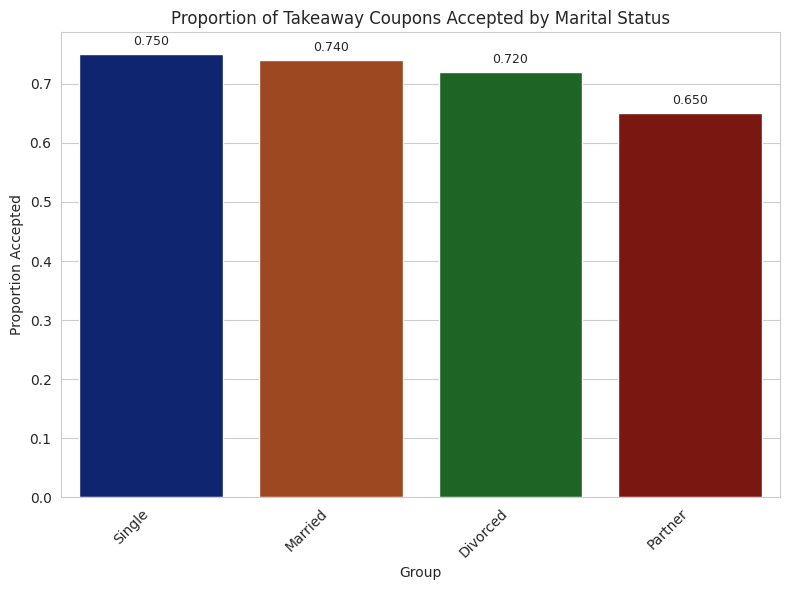

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the new table
groups = ['Single', 'Married', 'Divorced', 'Partner']
proportions = [0.75, 0.74, 0.72, 0.65]

# Creating a DataFrame with the updated data
df = pd.DataFrame({'Group': groups, 'Proportion Accepted': proportions})

# Plotting
plt.figure(figsize=(8, 6))  # Adjusted for the number of groups
barplot = sns.barplot(x='Group', y='Proportion Accepted', data=df, hue='Group', palette="dark")
plt.title('Proportion of Takeaway Coupons Accepted by Marital Status')
plt.xticks(rotation=45, ha="right")

# Adding the text on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=9,
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()

plt.savefig('images/marital_status_proportion_accepted_chart.png')

plt.show()


**Proportion of Single White Collar Professionals who Accepted Coupons by Age

In [229]:
age_proportions = []

for age_range in ["16 - 20", "21 - 25", "26 - 30", "31 - 35", "36 - 40", "41 - 45", "46 - 65"]:
    age_filter = (takeaway_df['age'] >= int(age_range[:2])) & (takeaway_df['age'] <= int(age_range[-2:]))
    marital_filter = (takeaway_df['marital_status'] == 'single')
    prof_filter = (takeaway_df['professional_status'] == 'white collar')

    combined_filter = age_filter & marital_filter & children_filter & prof_filter

    subset_df = takeaway_df[combined_filter]

    total_offered = len(subset_df)
    total_accepted = len(subset_df[subset_df['accepted'] == 1])

    proportion = total_accepted / total_offered if total_offered > 0 else 0

    age_proportions.append((age_range, proportion, total_offered, total_accepted))

age_proportions.sort(key=lambda x: x[1], reverse=True)

for age_range, proportion, total_offered, total_accepted in age_proportions:
    print(f"age {age_range}")
    print(f"Total takeaway coupons offered: {total_offered}")
    print(f"Total takeaway coupons accepted: {total_accepted}")
    print(f"Proportion of accepted coupons: {proportion:.3f}\n")

age 21 - 25
Total takeaway coupons offered: 5
Total takeaway coupons accepted: 5
Proportion of accepted coupons: 1.000

age 26 - 30
Total takeaway coupons offered: 13
Total takeaway coupons accepted: 13
Proportion of accepted coupons: 1.000

age 31 - 35
Total takeaway coupons offered: 3
Total takeaway coupons accepted: 3
Proportion of accepted coupons: 1.000

age 46 - 65
Total takeaway coupons offered: 15
Total takeaway coupons accepted: 13
Proportion of accepted coupons: 0.867

age 36 - 40
Total takeaway coupons offered: 5
Total takeaway coupons accepted: 3
Proportion of accepted coupons: 0.600

age 41 - 45
Total takeaway coupons offered: 16
Total takeaway coupons accepted: 9
Proportion of accepted coupons: 0.562

age 16 - 20
Total takeaway coupons offered: 0
Total takeaway coupons accepted: 0
Proportion of accepted coupons: 0.000



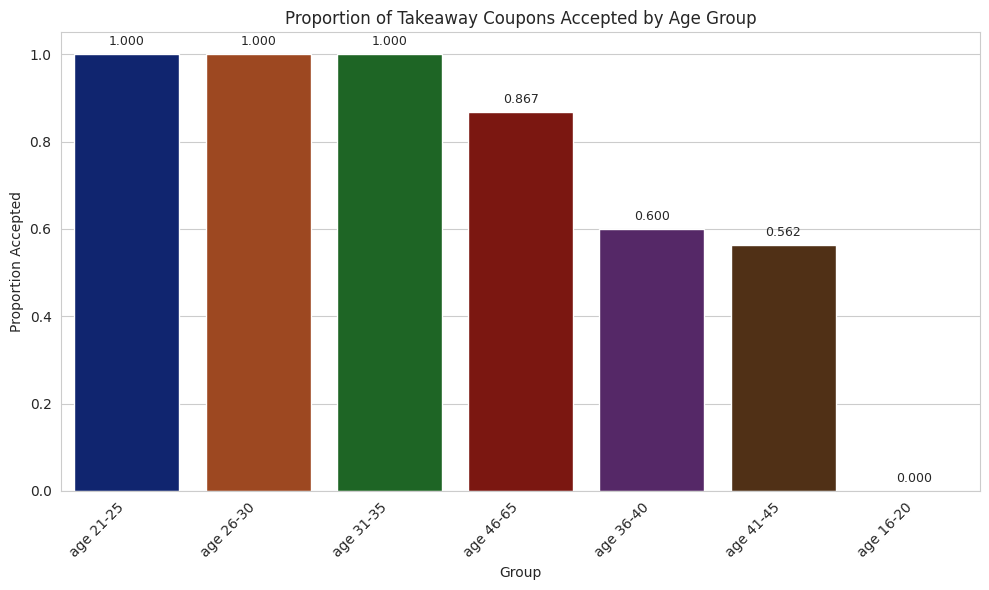

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the age groups
groups = ['age 21-25', 'age 26-30', 'age 31-35', 'age 46-65', 'age 36-40', 'age 41-45', 'age 16-20']
proportions = [1.000, 1.000, 1.000, 0.867, 0.600, 0.562, 0.000]

# Creating a DataFrame with the age group data
df = pd.DataFrame({'Group': groups, 'Proportion Accepted': proportions})

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed
barplot = sns.barplot(x='Group', y='Proportion Accepted', data=df, hue='Group', palette="dark")
plt.title('Proportion of Takeaway Coupons Accepted by Age Group')
plt.xticks(rotation=45, ha="right")

# Adding the text on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.3f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=9,
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()

plt.savefig('images/age_group_proportion_accepted_chart.png')  # Uncomment to save the figure

plt.show()
